In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
df=pd.read_csv("F:\\data\\train_agri.csv")

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df.shape

(4599, 10)

In [5]:
df.isna()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,True,False,False,False
4595,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False


In [6]:
df_test=pd.read_csv("F:\\data\\test_agri.csv")

In [7]:
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [8]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [9]:
df_test.shape

(1199, 9)

df.skew()

In [10]:
df.dropna(inplace=True)

#skewness of the data

In [11]:
df_test.dropna(inplace=True)

#corelation

In [12]:
df.drop(['ID'],axis=1,inplace =True)
df_test.drop(['ID'],axis=1,inplace =True)

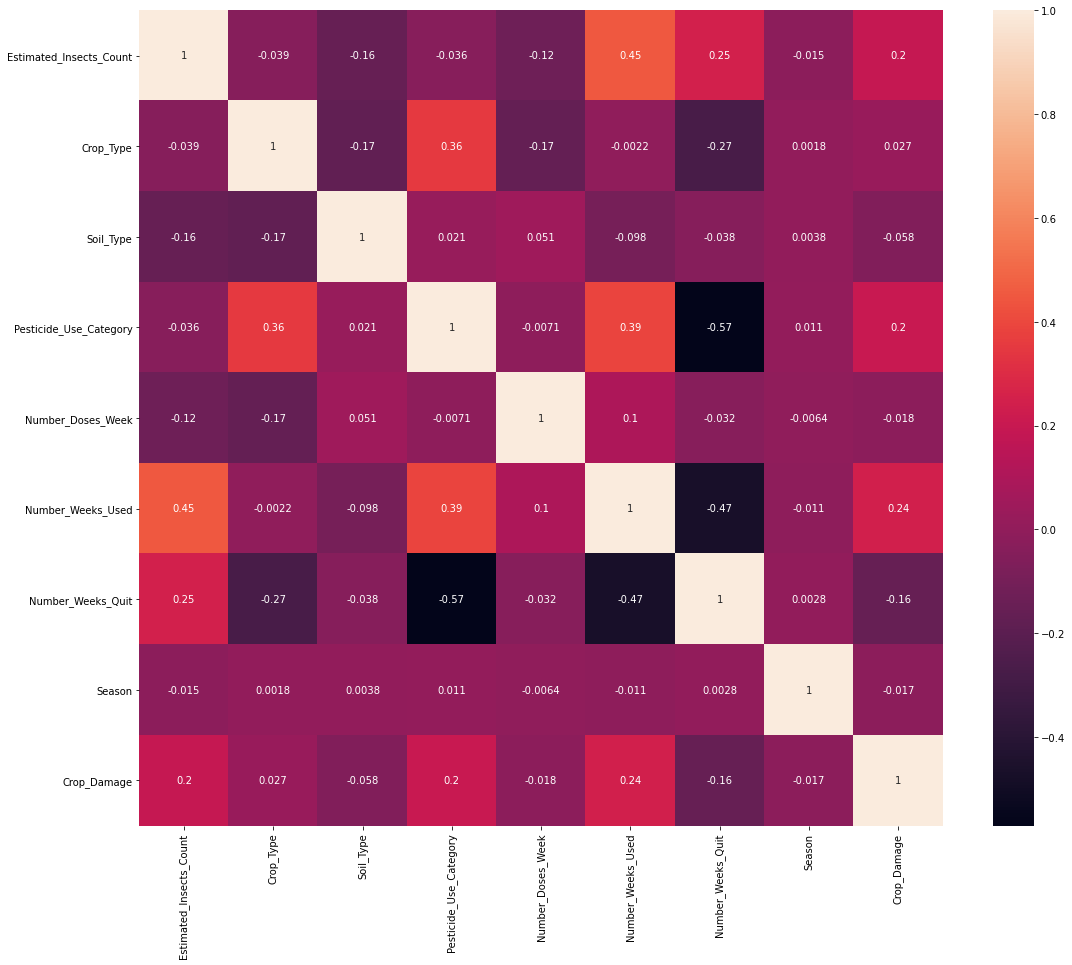

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(18,15)
sns.heatmap(data=df.corr(),annot=True)


# Eda

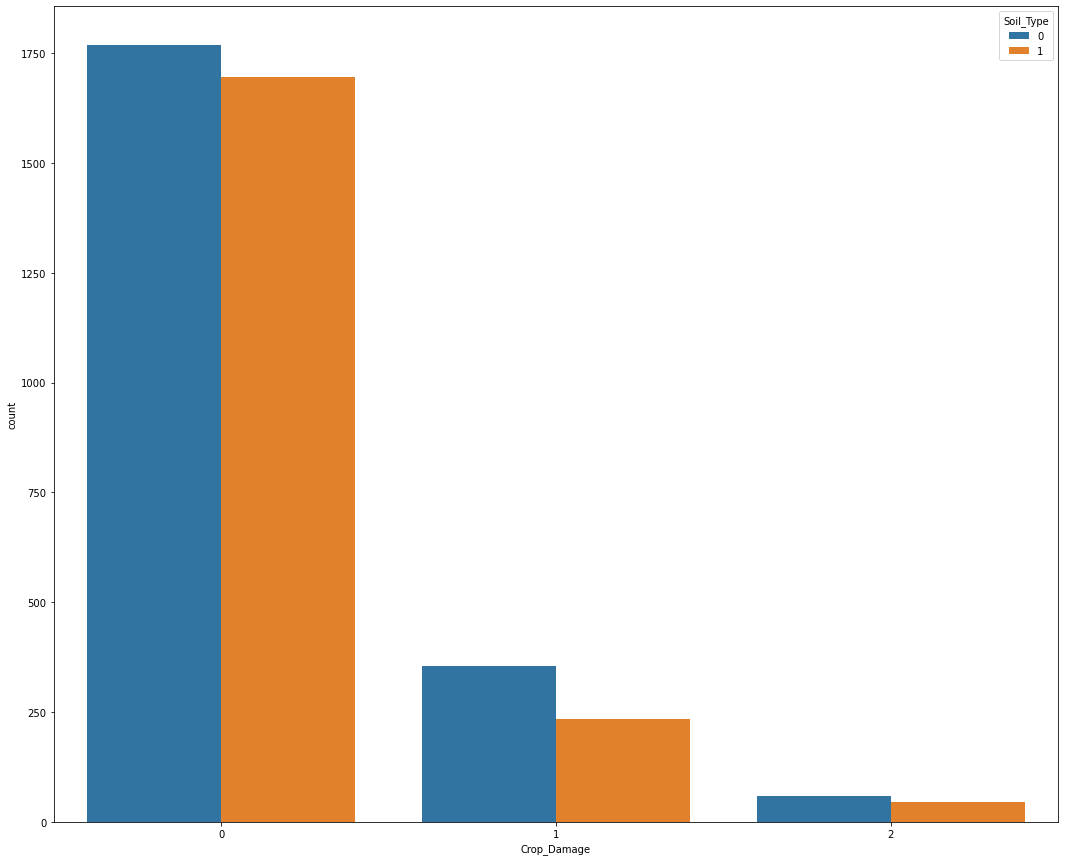

In [20]:
sns.countplot(data=df,x='Crop_Damage',hue='Soil_Type')

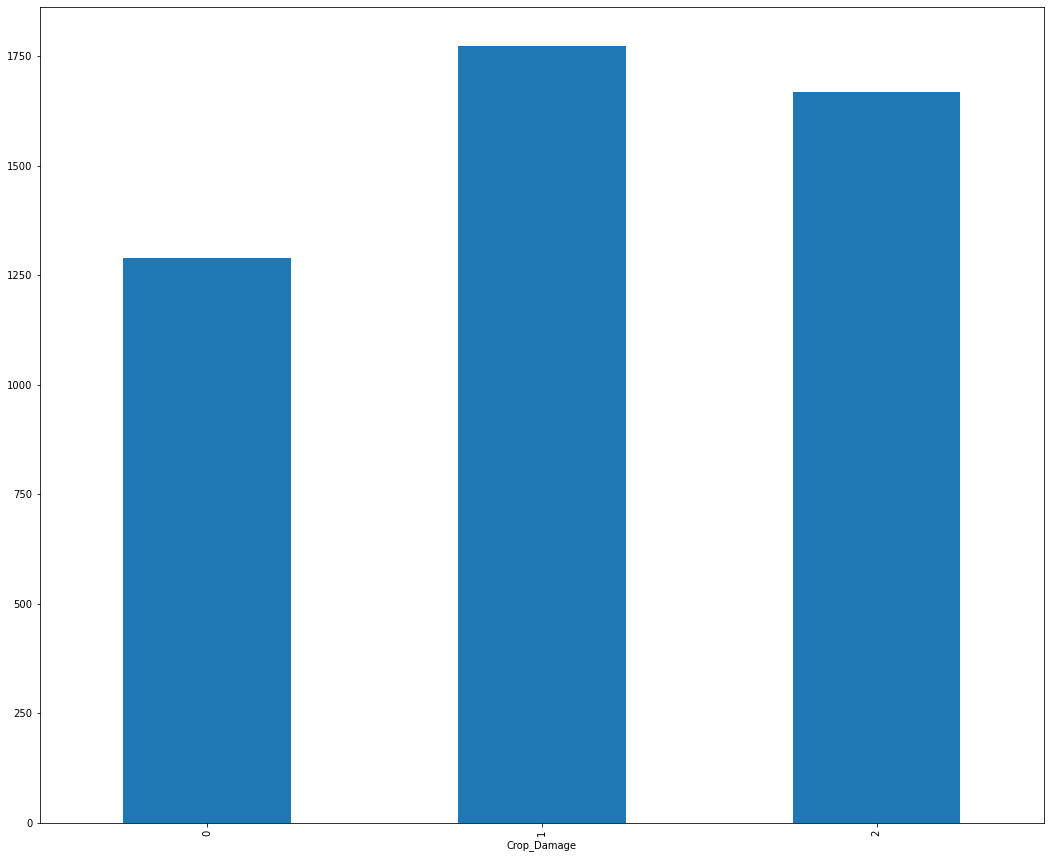

In [26]:
df.groupby('Crop_Damage')['Estimated_Insects_Count'].mean().plot(kind='bar')

avg of Estimated_Insects_Count more  in type 1 crop damage

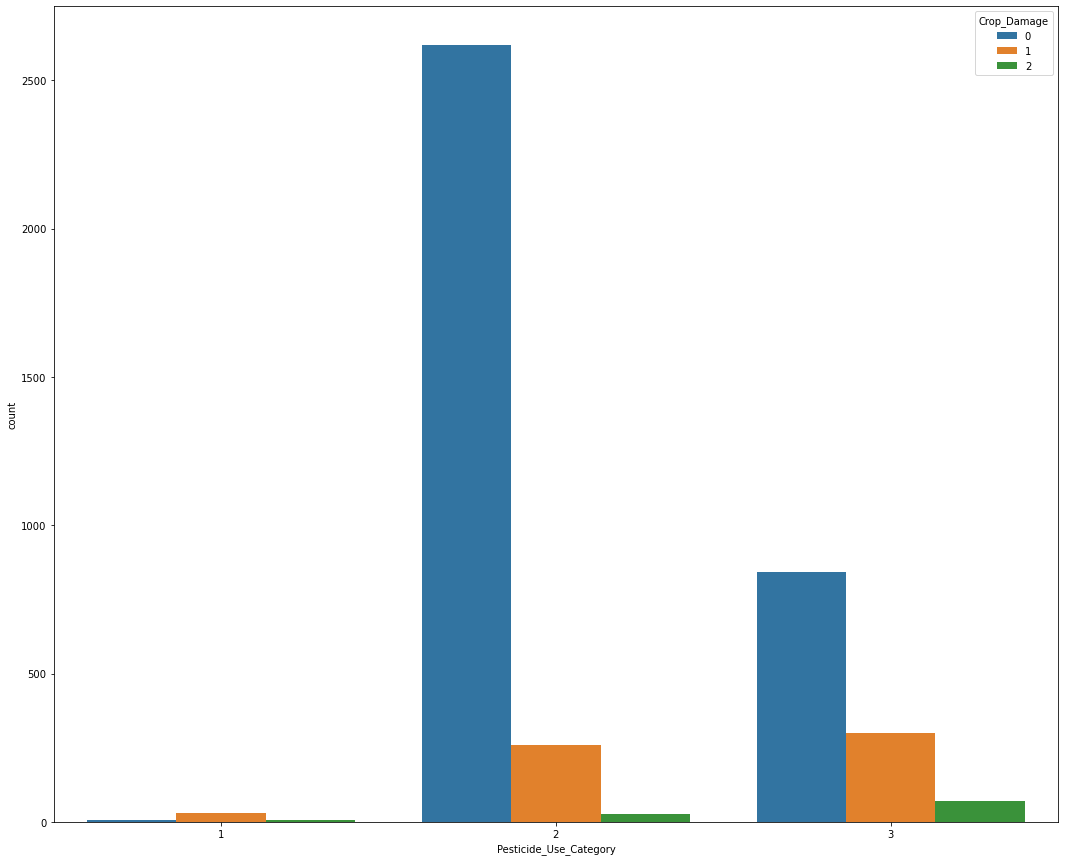

In [30]:
sns.countplot(data=df,x='Pesticide_Use_Category',hue='Crop_Damage')

type 3 pesticide  caused  more damage 

In [31]:
from sklearn.model_selection import train_test_split
X=df.drop(['Crop_Damage'],axis=1)
y=df['Crop_Damage']

In [39]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
ran=RandomForestClassifier()
de=DecisionTreeClassifier()
ran=RandomForestClassifier()
sv=SVC()
knn=KNeighborsClassifier()

In [42]:
maxscore=0
lst=[ran,de,sv,knn]
for i in lst:
    for j in range(42,101):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=j)
        i.fit(X_train,y_train)
        sco=i.score(X_test,y_test)
        if sco>maxscore:
            maxscore=sco
            best_state=j
            best_clas= i
print()
print()
print(maxscore,best_state,best_clas)
            
        
    




0.8725961538461539 86 SVC()


In [52]:
X_test=df_test

In [53]:
y_pred=sv.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)